## Esercizio 1

Un monitoraggio sulla densità di polveri sottili nell’aria ha condotto alle frequenze
riportate nella tabella sotto, in opportune unità di misura. Si calcolino i quartili empirici.

![Diagramma](img/Esercizio1.png)


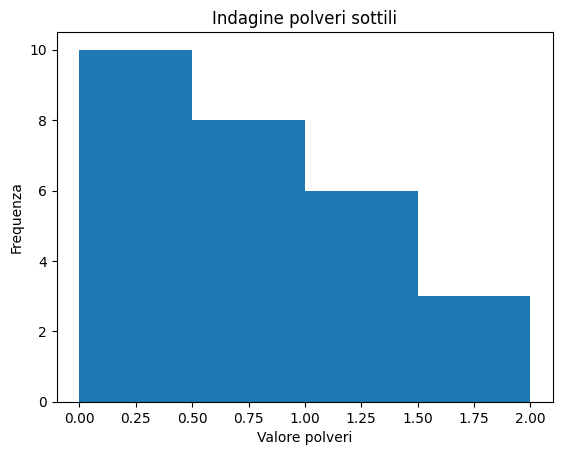

In [63]:
import matplotlib.pyplot as plt
import numpy as np

assex = np.array([[0, 0.5], [0.5, 1], [1, 1.5], [1.5, 2]])
assey = [10, 8, 6, 3]

ampiezza = assex[:, 1] - assex[:, 0]
centers = 0.5 * (assex[:, 1] + assex[:, 0])

probabilita = assey / np.sum(assey)  # pi
sommacumulativa = np.cumsum(probabilita)  # Fi
sommacumulativa = np.insert(sommacumulativa, 0, 0)  # Inserisce 0 all'inizio dell'array

plt.bar(centers, assey, ampiezza)

plt.title("Indagine polveri sottili")
plt.xlabel("Valore polveri")
plt.ylabel("Frequenza")

plt.show()

In [64]:
x = [0, 0.5, 1, 1.5, 2]
alpha = [0.25, 0.5, 0.75]

# Calcolo degli indici per la funzione di ripartizione empirica

indici = np.zeros(3, dtype=int)

for k in range(3):
    for j in range(1, 5):
        if alpha[k] > sommacumulativa[j - 1] and alpha[k] <= sommacumulativa[j]:
            indici[k] = j

print(indici)

[1 2 3]


In [65]:
# Calcolo dei quantili

q_alpha = np.zeros(3)

for k in range(3):
    j = indici[k]
    q_alpha[k] = x[j - 1] + (alpha[k] - sommacumulativa[j - 1]) * (x[j] - x[j - 1]) / (
        sommacumulativa[j] - sommacumulativa[j - 1]
    )

print(q_alpha)

[0.3375  0.71875 1.1875 ]


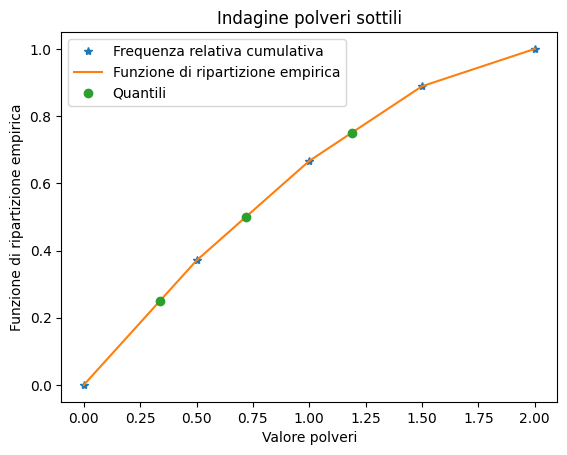

In [66]:
# Creazione del grafico

plt.plot(x, sommacumulativa, "*", label="Frequenza relativa cumulativa")
plt.plot(x, sommacumulativa, label="Funzione di ripartizione empirica")
plt.plot(q_alpha, alpha, "o", label="Quantili")

plt.legend()

plt.title("Indagine polveri sottili")
plt.xlabel("Valore polveri")
plt.ylabel("Funzione di ripartizione empirica")

plt.show()

# Esercizio 2

L’altezza di 2000 individui di una popolazione è riportata nel file ’Data altezze.dat’.

1. Calcolare media e deviazione standard della popolazione.
2. Costruire un istogramma a 20 barre.
3. Si possono adattare ai dati una distribuzione normale?


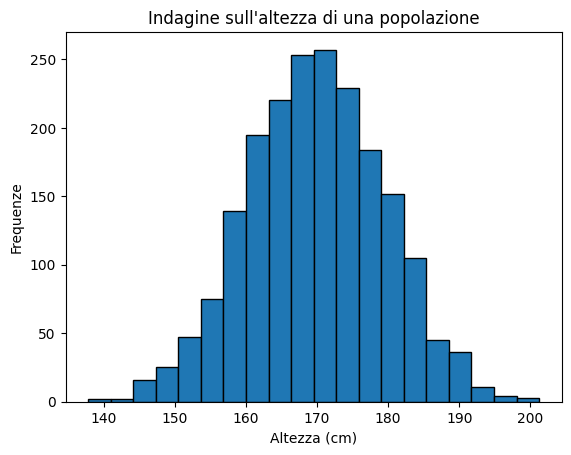

In [67]:
import numpy as np
import matplotlib.pyplot as plt

X = np.loadtxt("Data_altezze.dat")

media = np.mean(X)
dev_std = np.std(X)

plt.hist(X, 20, edgecolor="black")

plt.title("Indagine sull'altezza di una popolazione")
plt.xlabel("Altezza (cm)")
plt.ylabel("Frequenze")

plt.show()

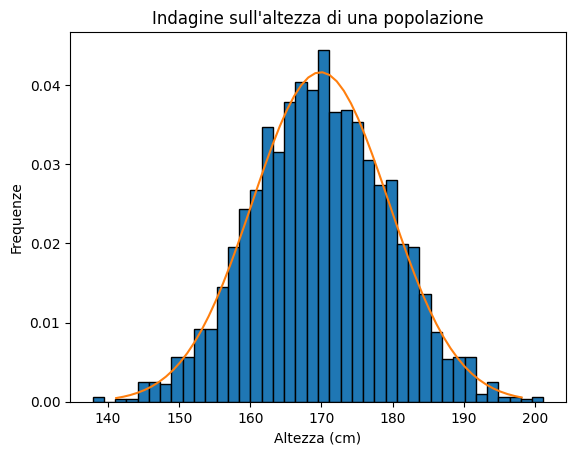

In [68]:
from scipy.stats import norm

assex = np.arange(media - (3 * dev_std), media + (3 * dev_std))
assey = norm.pdf(assex, media, dev_std)

plt.hist(X, 40, edgecolor="black", density="True")
plt.plot(assex, assey)

plt.title("Indagine sull'altezza di una popolazione")
plt.xlabel("Altezza (cm)")
plt.ylabel("Frequenze")

plt.show()

## Esercizio 3

Si vuole testare un dispositivo con uno strumento che fornice delle misure di voltaggio. Si
eseguono 9 misurazioni registrando i valori in volt
11, 13.2, 12.3, 10.9, 13, 10.5, 12.3, 13, 13.15.
E' nota la precisione dello strumento e si ha σ = 1 V.

1. Si determinino gli intervalli di confidenza al 95% e al 99%.
2. Determinare gli stessi intervalli di confidenza nel caso in cui si avesse σ = 1.4 V.
3. Sempre con precisione σ = 1 V, determinare gli stessi intervalli con la stessa media delle
   misure ma supponendo che essa provenga da un campione di 20 misurazioni.


In [69]:
import numpy as np
from scipy.stats import norm

X = np.array([11, 13.2, 12.3, 10.9, 13, 10.5, 12.3, 13, 13.15])
media = np.mean(X)
n = X.size

In [70]:
# Primo punto

sigma = 1

alpha = 0.05
phi = norm.ppf(1 - alpha / 2)

min = media - sigma / np.sqrt(n) * phi
max = media + sigma / np.sqrt(n) * phi

print("Intervallo di confidenza al 95% [{},{}]".format(min, max))

alpha = 0.01
phi = norm.ppf(1 - alpha / 2)

min = media - sigma / np.sqrt(n) * phi
max = media + sigma / np.sqrt(n) * phi

print("Intervallo di confidenza al 99% [{},{}]".format(min, max))

Intervallo di confidenza al 95% [11.496678671819982,12.803321328180019]
Intervallo di confidenza al 99% [11.291390232150366,13.008609767849634]


In [71]:
# Secondo punto

sigma = 1.4

alpha = 0.05
phi = norm.ppf(1 - alpha / 2)

min = media - sigma / np.sqrt(n) * phi
max = media + sigma / np.sqrt(n) * phi

print("Intervallo di confidenza al 95% [{},{}]".format(min, max))

alpha = 0.01
phi = norm.ppf(1 - alpha / 2)

min = media - sigma / np.sqrt(n) * phi
max = media + sigma / np.sqrt(n) * phi

print("Intervallo di confidenza al 99% [{},{}]".format(min, max))

Intervallo di confidenza al 95% [11.235350140547975,13.064649859452025]
Intervallo di confidenza al 99% [10.947946325010513,13.352053674989488]


In [72]:
# Terzo punto

sigma = 1
n = 20

alpha = 0.05
phi = norm.ppf(1 - alpha / 2)

min = media - sigma / np.sqrt(n) * phi
max = media + sigma / np.sqrt(n) * phi

print("Intervallo di confidenza al 95% [{},{}]".format(min, max))

alpha = 0.01
phi = norm.ppf(1 - alpha / 2)

min = media - sigma / np.sqrt(n) * phi
max = media + sigma / np.sqrt(n) * phi

print("Intervallo di confidenza al 99% [{},{}]".format(min, max))

Intervallo di confidenza al 95% [11.71173872971171,12.58826127028829]
Intervallo di confidenza al 99% [11.574027057882873,12.725972942117128]


# Esercizio 4

Viene effettuato un test di rottura di un certo materiale ottenendo i seguenti valori in megapascal (MPa).

19.8 10.1 14.9 7.5 15.4 15.4
15.4 18.5 7.9 12.7 11.9 11.4
11.4 14.1 17.6 16.7 15.8
19.5 8.8 13.6 11.9 11.4

Dopo aver verificato graficamente che il campione proviene da una popolazione distribuita approssimativamente in modo normale, determinare l’intervallo di confidenza al 95% per la media


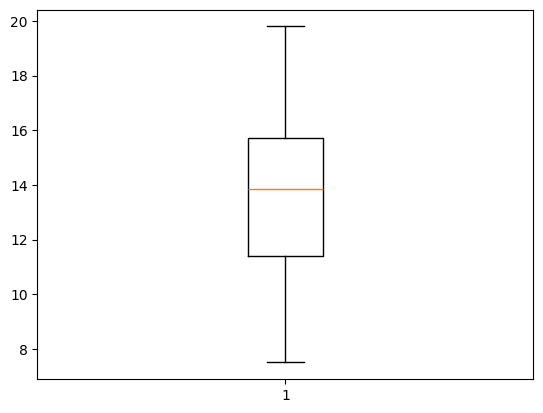

In [73]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt

X = np.array(
    [
        19.8,
        10.1,
        14.9,
        7.5,
        15.4,
        15.4,
        15.4,
        18.5,
        7.9,
        12.7,
        11.9,
        11.4,
        11.4,
        14.1,
        17.6,
        16.7,
        15.8,
        19.5,
        8.8,
        13.6,
        11.9,
        11.4,
    ]
)

# Verifichiamo che il campione provenga da una distribuzione approssimativamente normale

media = np.mean(X)  # Media
S = np.std(X, ddof=1)  # Restituisce la deviazione standard

plt.boxplot(X)
plt.show()

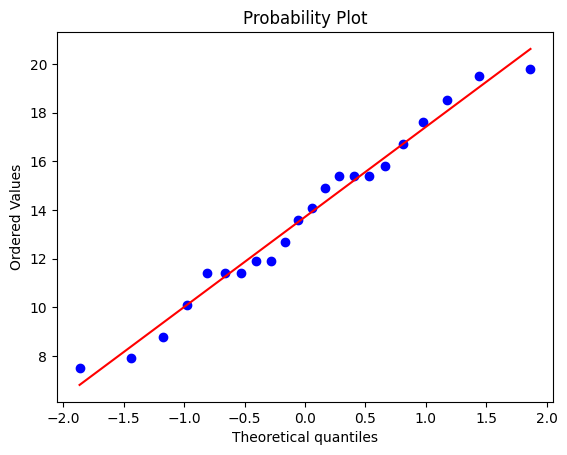

In [74]:
# Grafico di probabilità normale

from scipy.stats import probplot
from scipy.stats import norm

probplot(X, dist=norm, plot=plt)
plt.show()

In [75]:
n = X.size
gradiliberta = n - 1
alpha = 0.05

t = t.ppf(1 - alpha / 2, gradiliberta)

min = media - S / np.sqrt(n) * t
max = media + S / np.sqrt(n) * t

print("Intervallo di confidenza [{}, {}]".format(min, max))

Intervallo di confidenza [12.138069152904343, 15.289203574368383]


## Esercizio 5

Un macchinario riempie automaticamente delle bottiglie. Da un campione di 20 misurazioni si ottengono i seguenti valori (in litri)

2.05, 2.04, 1.98, 1.96, 2.03, 2.01, 1.97, 1.99, 2.01, 2.05
1.96, 1.95, 2.04, 2.01, 1.97, 1.96, 2.02, 2.04, 1.98, 1.94

Se la varianza fosse troppo grande, la proporzione di bottiglie sotto o sovrariempite sarebbe non accettabile.

Calcolare l’intervallo di confidenza al 95% per il limite superiore per la deviazione standard.


In [76]:
import numpy as np
from scipy.stats import chi2

X = np.array(
    [
        2.05,
        2.04,
        1.98,
        1.96,
        2.03,
        2.01,
        1.97,
        1.99,
        2.01,
        2.05,
        1.96,
        1.95,
        2.04,
        2.01,
        1.97,
        1.96,
        2.02,
        2.04,
        1.98,
        1.94,
    ]
)
n = X.size

S2 = np.std(X, ddof=1) ** 2

alpha = 0.05
chi2 = chi2.ppf(1 - alpha, n)

SIG2 = S2 * (n - 1) / chi2

print("Limite superiore per la varianza: ", SIG2)

SIG = np.sqrt(SIG2)

print("Limite superiore per la deviazione standard: ", SIG)

Limite superiore per la varianza:  0.0007933669721643767
Limite superiore per la deviazione standard:  0.02816677070884017
